# Cardiovascular disease prediction using SVM

### 1. Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.model_selection import train_test_split #import train__test_split function
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics #import scikit -learn metrics module for accuracy calculationimport seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset using pandas

In [2]:
df=pd.read_csv('documents\cardiovasc.csv')

### 3.Data preprocessing(No missing values)

In [3]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,19425.466667,1.366667,164.455333,74.629533,126.766667,92.504000,1.393333,1.244000,0.091333,0.052667,0.783333,0.496000
std,2513.921717,0.482055,8.207857,15.066064,17.554230,101.536925,0.701629,0.590505,0.288179,0.223442,0.412111,0.500151
min,14307.000000,1.000000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17539.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19666.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21305.500000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23661.000000,2.000000,198.000000,200.000000,220.000000,1100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### 4.Correlation Matrix

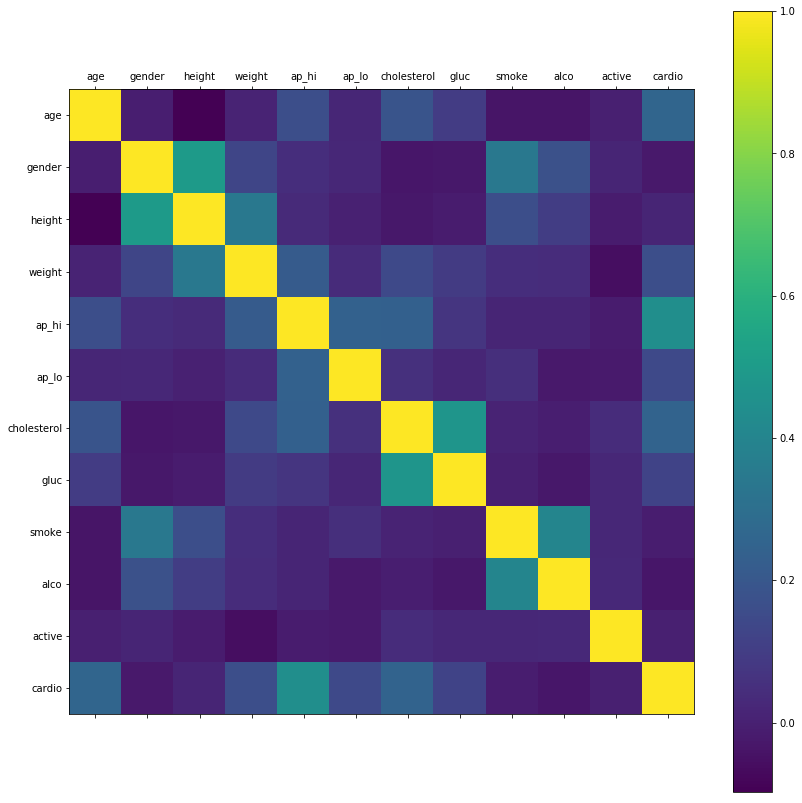

In [5]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

### 5.Counts of each target class

Text(0.5, 1.0, 'Count of each Target Class')

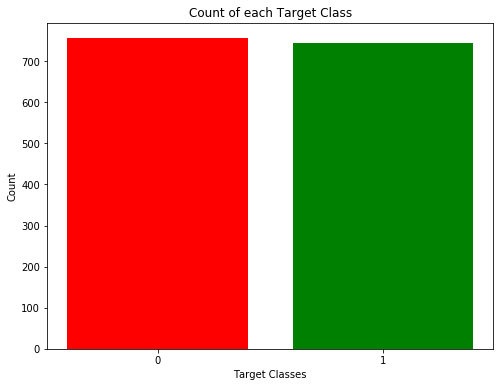

In [6]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['cardio'].unique(), df['cardio'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### 6.Split the data into train and test using sklearn

In [7]:
y = df['cardio']
X = df.drop(['cardio'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 7. Fit the model using svm

In [8]:
svc_scores = []
kernels = ['linear']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

##### Plotting the graph

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

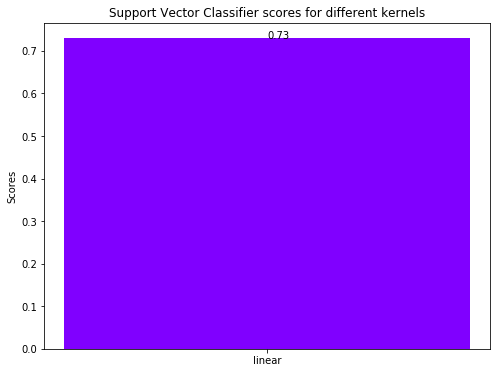

In [9]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
#plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

### 8. Predict targets for test dataset

In [10]:
y_pred = svc_classifier.predict(X_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.73
Precision: 0.782608695652174
Recall: 0.6792452830188679


### 9. Describing the performance of model using C

In [12]:
cm=confusion_matrix(y_test,y_pred)

In [13]:
cm

array([[111,  30],
       [ 51, 108]], dtype=int64)

### 10. Prediction on new feature

In [19]:
a=svc_classifier.predict([[21746,1,162,57,160,100,1,1,0,0,1]])

In [20]:
a

array([1], dtype=int64)

In [24]:
if(a==1):
    print("Person is having cardiovascular disease!!!!!!!")
else:
    print("Person is not having cardiovascular disease")

Person is not having cardiovascular disease
